In [4]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  



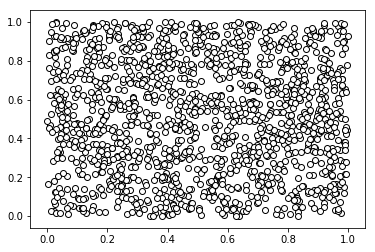

In [40]:
X = np.random.random( (1500, 2))

plt.scatter(X[:, 0], X[:, 1],  c = "white", edgecolor='k')

plt.savefig('random-1500-%d.png'%(n_clusters), bbox_inches='tight')



Number of clusters: 2
Silhouette Coefficient: 0.358


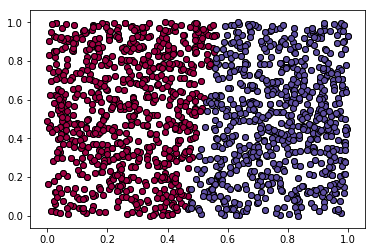

In [41]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)
#X_db = X
n_clusters = 2

clusterer = KMeans(n_clusters = n_clusters).fit(X_db)
labels = clusterer.predict(X_db)



print('Number of clusters: %d' % n_clusters)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

plt.savefig('kmeans-random-1500-%d.png'%(n_clusters), bbox_inches='tight')

In [30]:
np.set_printoptions(suppress=True)
sc.inverse_transform(clusterer.cluster_centers_)


array([[ 0.58056375,  0.22146937],
       [ 0.4041706 ,  0.73634012]])

In [42]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_db = StandardScaler().fit_transform(X)
db = DBSCAN().fit(X_db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

Estimated number of clusters: 1


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

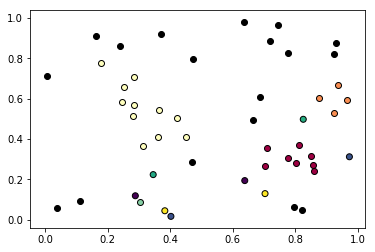

In [27]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
        #continue

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

#plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.savefig('dbscan-random.png', bbox_inches='tight')